In [1]:
from web3 import Web3
from ipywidgets import IntProgress
from IPython.display import display
import pandas as pd
import teneto
from teneto import TemporalNetwork
import matplotlib.pyplot as plt

In [11]:
#w3 = Web3(Web3.IPCProvider('./ipc/jsonrpc.ipc'))
w3 = Web3(Web3.WebsocketProvider('ws://localhost:8546'))
w3.isConnected()

True

In [61]:
start_block = 2000000
end_block = 2000500
progress = IntProgress(min=0, max=(end_block - start_block))

In [62]:
progress = IntProgress(min=0, max=(end_block - start_block))
addresses = set()
transactions = []
for idx in range(start_block, end_block):
    display(progress)
    b = w3.eth.getBlock(idx, full_transactions=True)
    for tx in b.transactions:
        addresses.add(tx['to'])
        addresses.add(tx['from'])
        transactions.append([b.timestamp, idx, tx['to'], tx['from']])

    progress.value += 1

IntProgress(value=0, max=500)

IntProgress(value=1, max=500)

IntProgress(value=2, max=500)

IntProgress(value=3, max=500)

IntProgress(value=4, max=500)

IntProgress(value=5, max=500)

IntProgress(value=6, max=500)

IntProgress(value=7, max=500)

IntProgress(value=8, max=500)

IntProgress(value=9, max=500)

IntProgress(value=10, max=500)

IntProgress(value=11, max=500)

IntProgress(value=12, max=500)

IntProgress(value=13, max=500)

IntProgress(value=14, max=500)

IntProgress(value=15, max=500)

IntProgress(value=16, max=500)

IntProgress(value=17, max=500)

IntProgress(value=18, max=500)

IntProgress(value=19, max=500)

IntProgress(value=20, max=500)

IntProgress(value=21, max=500)

IntProgress(value=22, max=500)

IntProgress(value=23, max=500)

IntProgress(value=24, max=500)

IntProgress(value=25, max=500)

IntProgress(value=26, max=500)

IntProgress(value=27, max=500)

IntProgress(value=28, max=500)

IntProgress(value=29, max=500)

IntProgress(value=30, max=500)

IntProgress(value=31, max=500)

IntProgress(value=32, max=500)

IntProgress(value=33, max=500)

IntProgress(value=34, max=500)

IntProgress(value=35, max=500)

IntProgress(value=36, max=500)

IntProgress(value=37, max=500)

IntProgress(value=38, max=500)

IntProgress(value=39, max=500)

IntProgress(value=40, max=500)

IntProgress(value=41, max=500)

IntProgress(value=42, max=500)

IntProgress(value=43, max=500)

IntProgress(value=44, max=500)

IntProgress(value=45, max=500)

IntProgress(value=46, max=500)

IntProgress(value=47, max=500)

IntProgress(value=48, max=500)

IntProgress(value=49, max=500)

IntProgress(value=50, max=500)

IntProgress(value=51, max=500)

IntProgress(value=52, max=500)

IntProgress(value=53, max=500)

IntProgress(value=54, max=500)

IntProgress(value=55, max=500)

IntProgress(value=56, max=500)

IntProgress(value=57, max=500)

IntProgress(value=58, max=500)

IntProgress(value=59, max=500)

IntProgress(value=60, max=500)

IntProgress(value=61, max=500)

IntProgress(value=62, max=500)

IntProgress(value=63, max=500)

IntProgress(value=64, max=500)

IntProgress(value=65, max=500)

IntProgress(value=66, max=500)

IntProgress(value=67, max=500)

IntProgress(value=68, max=500)

IntProgress(value=69, max=500)

IntProgress(value=70, max=500)

IntProgress(value=71, max=500)

IntProgress(value=72, max=500)

IntProgress(value=73, max=500)

IntProgress(value=74, max=500)

IntProgress(value=75, max=500)

IntProgress(value=76, max=500)

IntProgress(value=77, max=500)

IntProgress(value=78, max=500)

IntProgress(value=79, max=500)

IntProgress(value=80, max=500)

IntProgress(value=81, max=500)

IntProgress(value=82, max=500)

IntProgress(value=83, max=500)

IntProgress(value=84, max=500)

IntProgress(value=85, max=500)

IntProgress(value=86, max=500)

IntProgress(value=87, max=500)

IntProgress(value=88, max=500)

IntProgress(value=89, max=500)

IntProgress(value=90, max=500)

IntProgress(value=91, max=500)

IntProgress(value=92, max=500)

IntProgress(value=93, max=500)

IntProgress(value=94, max=500)

IntProgress(value=95, max=500)

IntProgress(value=96, max=500)

IntProgress(value=97, max=500)

IntProgress(value=98, max=500)

IntProgress(value=99, max=500)

IntProgress(value=100, max=500)

IntProgress(value=101, max=500)

IntProgress(value=102, max=500)

IntProgress(value=103, max=500)

IntProgress(value=104, max=500)

IntProgress(value=105, max=500)

IntProgress(value=106, max=500)

IntProgress(value=107, max=500)

IntProgress(value=108, max=500)

IntProgress(value=109, max=500)

IntProgress(value=110, max=500)

IntProgress(value=111, max=500)

IntProgress(value=112, max=500)

IntProgress(value=113, max=500)

IntProgress(value=114, max=500)

IntProgress(value=115, max=500)

IntProgress(value=116, max=500)

IntProgress(value=117, max=500)

IntProgress(value=118, max=500)

IntProgress(value=119, max=500)

IntProgress(value=120, max=500)

IntProgress(value=121, max=500)

IntProgress(value=122, max=500)

IntProgress(value=123, max=500)

IntProgress(value=124, max=500)

IntProgress(value=125, max=500)

IntProgress(value=126, max=500)

IntProgress(value=127, max=500)

IntProgress(value=128, max=500)

IntProgress(value=129, max=500)

IntProgress(value=130, max=500)

IntProgress(value=131, max=500)

IntProgress(value=132, max=500)

IntProgress(value=133, max=500)

IntProgress(value=134, max=500)

IntProgress(value=135, max=500)

IntProgress(value=136, max=500)

IntProgress(value=137, max=500)

IntProgress(value=138, max=500)

IntProgress(value=139, max=500)

IntProgress(value=140, max=500)

IntProgress(value=141, max=500)

IntProgress(value=142, max=500)

IntProgress(value=143, max=500)

IntProgress(value=144, max=500)

IntProgress(value=145, max=500)

IntProgress(value=146, max=500)

IntProgress(value=147, max=500)

IntProgress(value=148, max=500)

IntProgress(value=149, max=500)

IntProgress(value=150, max=500)

IntProgress(value=151, max=500)

IntProgress(value=152, max=500)

IntProgress(value=153, max=500)

IntProgress(value=154, max=500)

IntProgress(value=155, max=500)

IntProgress(value=156, max=500)

IntProgress(value=157, max=500)

IntProgress(value=158, max=500)

IntProgress(value=159, max=500)

IntProgress(value=160, max=500)

IntProgress(value=161, max=500)

IntProgress(value=162, max=500)

IntProgress(value=163, max=500)

IntProgress(value=164, max=500)

IntProgress(value=165, max=500)

IntProgress(value=166, max=500)

IntProgress(value=167, max=500)

IntProgress(value=168, max=500)

IntProgress(value=169, max=500)

IntProgress(value=170, max=500)

IntProgress(value=171, max=500)

IntProgress(value=172, max=500)

IntProgress(value=173, max=500)

IntProgress(value=174, max=500)

IntProgress(value=175, max=500)

IntProgress(value=176, max=500)

IntProgress(value=177, max=500)

IntProgress(value=178, max=500)

IntProgress(value=179, max=500)

IntProgress(value=180, max=500)

IntProgress(value=181, max=500)

IntProgress(value=182, max=500)

IntProgress(value=183, max=500)

IntProgress(value=184, max=500)

IntProgress(value=185, max=500)

IntProgress(value=186, max=500)

IntProgress(value=187, max=500)

IntProgress(value=188, max=500)

IntProgress(value=189, max=500)

IntProgress(value=190, max=500)

IntProgress(value=191, max=500)

IntProgress(value=192, max=500)

IntProgress(value=193, max=500)

IntProgress(value=194, max=500)

IntProgress(value=195, max=500)

IntProgress(value=196, max=500)

IntProgress(value=197, max=500)

IntProgress(value=198, max=500)

IntProgress(value=199, max=500)

IntProgress(value=200, max=500)

IntProgress(value=201, max=500)

IntProgress(value=202, max=500)

IntProgress(value=203, max=500)

IntProgress(value=204, max=500)

IntProgress(value=205, max=500)

IntProgress(value=206, max=500)

IntProgress(value=207, max=500)

IntProgress(value=208, max=500)

IntProgress(value=209, max=500)

IntProgress(value=210, max=500)

IntProgress(value=211, max=500)

IntProgress(value=212, max=500)

IntProgress(value=213, max=500)

IntProgress(value=214, max=500)

IntProgress(value=215, max=500)

IntProgress(value=216, max=500)

IntProgress(value=217, max=500)

IntProgress(value=218, max=500)

IntProgress(value=219, max=500)

IntProgress(value=220, max=500)

IntProgress(value=221, max=500)

IntProgress(value=222, max=500)

IntProgress(value=223, max=500)

IntProgress(value=224, max=500)

IntProgress(value=225, max=500)

IntProgress(value=226, max=500)

IntProgress(value=227, max=500)

IntProgress(value=228, max=500)

IntProgress(value=229, max=500)

IntProgress(value=230, max=500)

IntProgress(value=231, max=500)

IntProgress(value=232, max=500)

IntProgress(value=233, max=500)

IntProgress(value=234, max=500)

IntProgress(value=235, max=500)

IntProgress(value=236, max=500)

IntProgress(value=237, max=500)

IntProgress(value=238, max=500)

IntProgress(value=239, max=500)

IntProgress(value=240, max=500)

IntProgress(value=241, max=500)

IntProgress(value=242, max=500)

IntProgress(value=243, max=500)

IntProgress(value=244, max=500)

IntProgress(value=245, max=500)

IntProgress(value=246, max=500)

IntProgress(value=247, max=500)

IntProgress(value=248, max=500)

IntProgress(value=249, max=500)

IntProgress(value=250, max=500)

IntProgress(value=251, max=500)

IntProgress(value=252, max=500)

IntProgress(value=253, max=500)

IntProgress(value=254, max=500)

IntProgress(value=255, max=500)

IntProgress(value=256, max=500)

IntProgress(value=257, max=500)

IntProgress(value=258, max=500)

IntProgress(value=259, max=500)

IntProgress(value=260, max=500)

IntProgress(value=261, max=500)

IntProgress(value=262, max=500)

IntProgress(value=263, max=500)

IntProgress(value=264, max=500)

IntProgress(value=265, max=500)

IntProgress(value=266, max=500)

IntProgress(value=267, max=500)

IntProgress(value=268, max=500)

IntProgress(value=269, max=500)

IntProgress(value=270, max=500)

IntProgress(value=271, max=500)

IntProgress(value=272, max=500)

IntProgress(value=273, max=500)

IntProgress(value=274, max=500)

IntProgress(value=275, max=500)

IntProgress(value=276, max=500)

IntProgress(value=277, max=500)

IntProgress(value=278, max=500)

IntProgress(value=279, max=500)

IntProgress(value=280, max=500)

IntProgress(value=281, max=500)

IntProgress(value=282, max=500)

IntProgress(value=283, max=500)

IntProgress(value=284, max=500)

IntProgress(value=285, max=500)

IntProgress(value=286, max=500)

IntProgress(value=287, max=500)

IntProgress(value=288, max=500)

IntProgress(value=289, max=500)

IntProgress(value=290, max=500)

IntProgress(value=291, max=500)

IntProgress(value=292, max=500)

IntProgress(value=293, max=500)

IntProgress(value=294, max=500)

IntProgress(value=295, max=500)

IntProgress(value=296, max=500)

IntProgress(value=297, max=500)

IntProgress(value=298, max=500)

IntProgress(value=299, max=500)

IntProgress(value=300, max=500)

IntProgress(value=301, max=500)

IntProgress(value=302, max=500)

IntProgress(value=303, max=500)

IntProgress(value=304, max=500)

IntProgress(value=305, max=500)

IntProgress(value=306, max=500)

IntProgress(value=307, max=500)

IntProgress(value=308, max=500)

IntProgress(value=309, max=500)

IntProgress(value=310, max=500)

IntProgress(value=311, max=500)

IntProgress(value=312, max=500)

IntProgress(value=313, max=500)

IntProgress(value=314, max=500)

IntProgress(value=315, max=500)

IntProgress(value=316, max=500)

IntProgress(value=317, max=500)

IntProgress(value=318, max=500)

IntProgress(value=319, max=500)

IntProgress(value=320, max=500)

IntProgress(value=321, max=500)

IntProgress(value=322, max=500)

IntProgress(value=323, max=500)

IntProgress(value=324, max=500)

IntProgress(value=325, max=500)

IntProgress(value=326, max=500)

IntProgress(value=327, max=500)

IntProgress(value=328, max=500)

IntProgress(value=329, max=500)

IntProgress(value=330, max=500)

IntProgress(value=331, max=500)

IntProgress(value=332, max=500)

IntProgress(value=333, max=500)

IntProgress(value=334, max=500)

IntProgress(value=335, max=500)

IntProgress(value=336, max=500)

IntProgress(value=337, max=500)

IntProgress(value=338, max=500)

IntProgress(value=339, max=500)

IntProgress(value=340, max=500)

IntProgress(value=341, max=500)

IntProgress(value=342, max=500)

IntProgress(value=343, max=500)

IntProgress(value=344, max=500)

IntProgress(value=345, max=500)

IntProgress(value=346, max=500)

IntProgress(value=347, max=500)

IntProgress(value=348, max=500)

IntProgress(value=349, max=500)

IntProgress(value=350, max=500)

IntProgress(value=351, max=500)

IntProgress(value=352, max=500)

IntProgress(value=353, max=500)

IntProgress(value=354, max=500)

IntProgress(value=355, max=500)

IntProgress(value=356, max=500)

IntProgress(value=357, max=500)

IntProgress(value=358, max=500)

IntProgress(value=359, max=500)

IntProgress(value=360, max=500)

IntProgress(value=361, max=500)

IntProgress(value=362, max=500)

IntProgress(value=363, max=500)

IntProgress(value=364, max=500)

IntProgress(value=365, max=500)

IntProgress(value=366, max=500)

IntProgress(value=367, max=500)

IntProgress(value=368, max=500)

IntProgress(value=369, max=500)

IntProgress(value=370, max=500)

IntProgress(value=371, max=500)

IntProgress(value=372, max=500)

IntProgress(value=373, max=500)

IntProgress(value=374, max=500)

IntProgress(value=375, max=500)

IntProgress(value=376, max=500)

IntProgress(value=377, max=500)

IntProgress(value=378, max=500)

IntProgress(value=379, max=500)

IntProgress(value=380, max=500)

IntProgress(value=381, max=500)

IntProgress(value=382, max=500)

IntProgress(value=383, max=500)

IntProgress(value=384, max=500)

IntProgress(value=385, max=500)

IntProgress(value=386, max=500)

IntProgress(value=387, max=500)

IntProgress(value=388, max=500)

IntProgress(value=389, max=500)

IntProgress(value=390, max=500)

IntProgress(value=391, max=500)

IntProgress(value=392, max=500)

IntProgress(value=393, max=500)

IntProgress(value=394, max=500)

IntProgress(value=395, max=500)

IntProgress(value=396, max=500)

IntProgress(value=397, max=500)

IntProgress(value=398, max=500)

IntProgress(value=399, max=500)

IntProgress(value=400, max=500)

IntProgress(value=401, max=500)

IntProgress(value=402, max=500)

IntProgress(value=403, max=500)

IntProgress(value=404, max=500)

IntProgress(value=405, max=500)

IntProgress(value=406, max=500)

IntProgress(value=407, max=500)

IntProgress(value=408, max=500)

IntProgress(value=409, max=500)

IntProgress(value=410, max=500)

IntProgress(value=411, max=500)

IntProgress(value=412, max=500)

IntProgress(value=413, max=500)

IntProgress(value=414, max=500)

IntProgress(value=415, max=500)

IntProgress(value=416, max=500)

IntProgress(value=417, max=500)

IntProgress(value=418, max=500)

IntProgress(value=419, max=500)

IntProgress(value=420, max=500)

IntProgress(value=421, max=500)

IntProgress(value=422, max=500)

IntProgress(value=423, max=500)

IntProgress(value=424, max=500)

IntProgress(value=425, max=500)

IntProgress(value=426, max=500)

IntProgress(value=427, max=500)

IntProgress(value=428, max=500)

IntProgress(value=429, max=500)

IntProgress(value=430, max=500)

IntProgress(value=431, max=500)

IntProgress(value=432, max=500)

IntProgress(value=433, max=500)

IntProgress(value=434, max=500)

IntProgress(value=435, max=500)

IntProgress(value=436, max=500)

IntProgress(value=437, max=500)

IntProgress(value=438, max=500)

IntProgress(value=439, max=500)

IntProgress(value=440, max=500)

IntProgress(value=441, max=500)

IntProgress(value=442, max=500)

IntProgress(value=443, max=500)

IntProgress(value=444, max=500)

IntProgress(value=445, max=500)

IntProgress(value=446, max=500)

IntProgress(value=447, max=500)

IntProgress(value=448, max=500)

IntProgress(value=449, max=500)

IntProgress(value=450, max=500)

IntProgress(value=451, max=500)

IntProgress(value=452, max=500)

IntProgress(value=453, max=500)

IntProgress(value=454, max=500)

IntProgress(value=455, max=500)

IntProgress(value=456, max=500)

IntProgress(value=457, max=500)

IntProgress(value=458, max=500)

IntProgress(value=459, max=500)

IntProgress(value=460, max=500)

IntProgress(value=461, max=500)

IntProgress(value=462, max=500)

IntProgress(value=463, max=500)

IntProgress(value=464, max=500)

IntProgress(value=465, max=500)

IntProgress(value=466, max=500)

IntProgress(value=467, max=500)

IntProgress(value=468, max=500)

IntProgress(value=469, max=500)

IntProgress(value=470, max=500)

IntProgress(value=471, max=500)

IntProgress(value=472, max=500)

IntProgress(value=473, max=500)

IntProgress(value=474, max=500)

IntProgress(value=475, max=500)

IntProgress(value=476, max=500)

IntProgress(value=477, max=500)

IntProgress(value=478, max=500)

IntProgress(value=479, max=500)

IntProgress(value=480, max=500)

IntProgress(value=481, max=500)

IntProgress(value=482, max=500)

IntProgress(value=483, max=500)

IntProgress(value=484, max=500)

IntProgress(value=485, max=500)

IntProgress(value=486, max=500)

IntProgress(value=487, max=500)

IntProgress(value=488, max=500)

IntProgress(value=489, max=500)

IntProgress(value=490, max=500)

IntProgress(value=491, max=500)

IntProgress(value=492, max=500)

IntProgress(value=493, max=500)

IntProgress(value=494, max=500)

IntProgress(value=495, max=500)

IntProgress(value=496, max=500)

IntProgress(value=497, max=500)

IntProgress(value=498, max=500)

IntProgress(value=499, max=500)

In [63]:
df = pd.DataFrame(transactions, columns = ['Timestamp', 'Block', 'From', 'To']) 
df.to_hdf('transactions.h5', key='raw_transactions', mode='a')

df

,Timestamp,Block,From,To
0,1559537405,2000000,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0x8De281f47B137979e55B6CEa598179737574C774
1,1559537405,2000000,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0xAcFfb14f786a485ab7F3fef5D9F092A69F929CA4
2,1559537405,2000000,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0x1eF319dB1930e3420fCfF90c376d9cf515B34876
3,1559537405,2000000,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0xc330469e600D3792d646a7D412D024EeA544cE00
4,1559537405,2000000,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0xe659bc6A60Ba2091c08F7df623BA6057349B6980
...,...,...,...,...
606,1559540245,2000497,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0xc330469e600D3792d646a7D412D024EeA544cE00
607,1559540245,2000497,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0xaA84378fA41da83a9B6523bA46E45A664FbEBFC8
608,1559540245,2000497,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0x93dA5507a26090448a03FC1F77e1C7DA20A24292
609,1559540245,2000497,0x9850711951A84Ef8a2A31a7868d0dCa34B0661cA,0xe659bc6A60Ba2091c08F7df623BA6057349B6980


In [2]:
df = pd.read_hdf('transactions.h5', 'raw_transactions')

In [3]:
# Replace addresses by vertex index
df['t'] = df['Block']
df['t'] = df['t'] - df['Block'][0] + 1

df['i'] = df['From']
df['j'] = df['To']

for i, val in enumerate(addresses):
  df.loc[df['i'] == val, 'i'] = i
  df.loc[df['j'] == val, 'j'] = i

df.to_hdf('transactions.h5', key='indexed_vertices', mode='a')
df

NameError: name 'addresses' is not defined

In [4]:
df = pd.read_hdf('transactions.h5', 'indexed_vertices')

In [16]:
t_df = df.drop(columns=['Timestamp', 'Block', 'From', 'To'])
t_df = t_df[['i', 'j', 't']]
t_df

,i,j,t
0,6,2,1
1,6,3,1
2,6,8,1
3,6,1,1
4,6,9,1
...,...,...,...
606,6,1,498
607,6,7,498
608,6,5,498
609,6,9,498


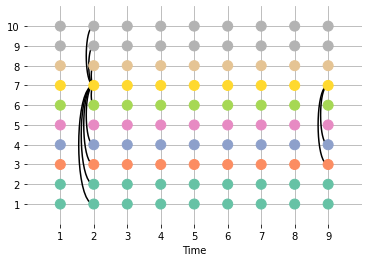

In [26]:
tnet = TemporalNetwork(from_df=t_df.head(10), nettype='bd')
tnet.plot('slice_plot', cmap='Set2')
plt.show()